In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

Fewer bins for brighter samples?

In [2]:
p0_19p0 = np.array((1.04029,12.80315,0.51193,10.25010,11.64354,0.,0.))
Npert = 200

In [3]:
run_1 = np.load('Run_050218/bolp_19p0_um_0_5650522.npz')

In [4]:
run_1.files

['i', 'func_all', 'param']

In [5]:
def plot_fp(param,func,ip,jf,folder):
    plt.figure()
    plt.plot(param,func,'b.')
    plt.axvline(p0_19p0[ip],linestyle=':',color='grey')
    plt.savefig(folder+'/p{}f{}'.format(ip,jf))
    plt.close()

In [6]:
for i in range(7):
    for j in range(160):
        plot_fp(run_1['param'][i*Npert:i*Npert+Npert,i],run_1['func_all'][i*Npert:i*Npert+Npert,j],i,j,\
               'Run_050218/bolp_19p0_um_0_5650522')

In [7]:
polydfdp_1 = np.zeros((7,160))

In [8]:
for i in range(7):
    p0 = p0_19p0[i]
    for j in range(160):
        a,b,c,d = np.polyfit(run_1['param'][i*Npert:i*Npert+Npert,i],\
                                 run_1['func_all'][i*Npert:i*Npert+Npert,j],3)
        polydfdp_1[i,j] = a*p0**3+b*p0**2+c*p0+d

In [9]:
fid_19p0 = np.load('Run_040118/bolp_19p0_0.npz')

In [10]:
def calc_cov(covjk,func_real):
    return np.mean(covjk,axis=0)+np.cov(func_real.T)

In [11]:
cov = calc_cov(fid_19p0['func_all_cov'],fid_19p0['func_all'])

In [12]:
def calc_fisher(dfdp, covtot):
    fmatrix = np.zeros((7,7))
    for i in range(7):
        for j in range(7):
            fmatrix[i,j] = np.dot(dfdp[i],np.dot(np.linalg.inv(covtot),dfdp[j]))
    return fmatrix

In [13]:
def calc_1sigma(fisher):
    return np.sqrt(np.linalg.inv(fisher).diagonal())

In [14]:
calc_1sigma(calc_fisher(polydfdp_1,cov))

array([ 0.74111926,  0.68994185,  0.44030907,  0.70261934,  0.48800919,
        0.37673792,  0.65577679])

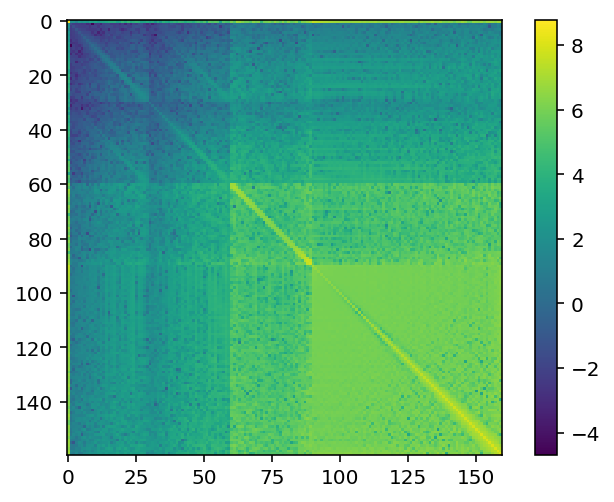

In [15]:
plt.imshow(np.log10(np.abs(np.linalg.inv(cov))))
plt.colorbar()

In [17]:
cov_half = calc_cov(fid_19p0['func_all_cov'][::2],fid_19p0['func_all'][::2])

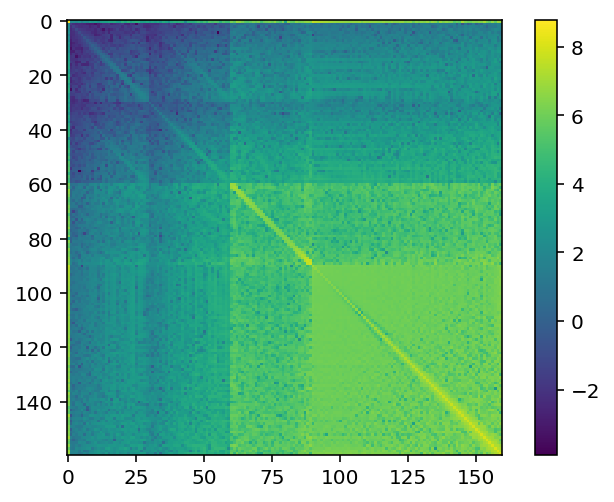

In [18]:
plt.imshow(np.log10(np.abs(np.linalg.inv(cov_half))))
plt.colorbar()

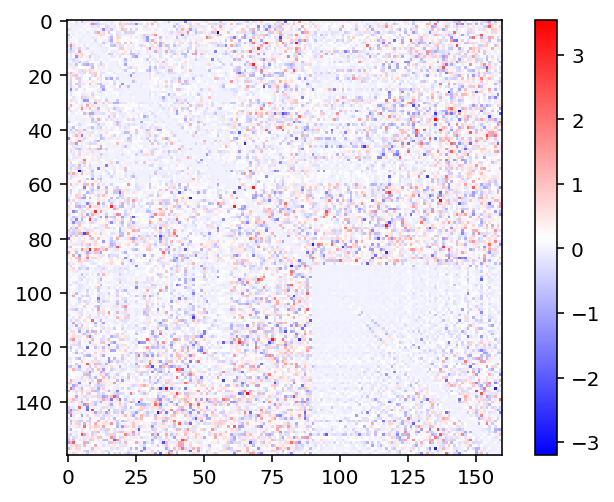

In [19]:
plt.imshow(np.log10(np.abs(np.linalg.inv(cov_half)/np.linalg.inv(cov))),cmap='bwr')
plt.colorbar()

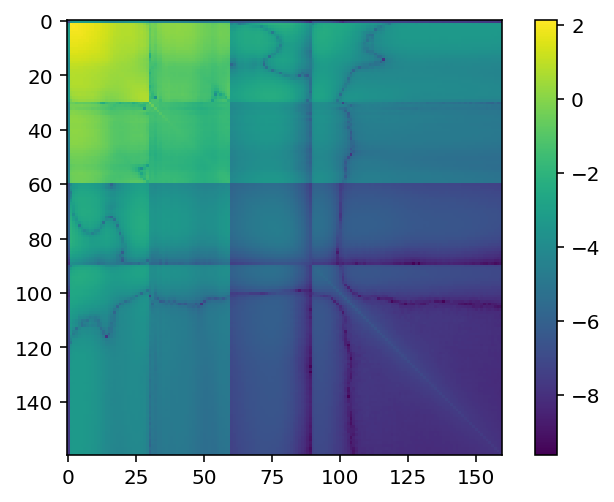

In [20]:
plt.imshow(np.log10(np.abs((cov))))
plt.colorbar()